<a href="https://colab.research.google.com/github/mello-pedro/Data_Science_Projects/blob/main/Projeto2_Pedro_Panorama_do_COVID_19_no_Brasil_finalizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 

Desde o início de 2020 o mundo tem sofrido as consequências do vírus da COVID-19, também conhecido como Coronavírus, e sobre o qual ainda sabemos muito pouco. 

Entretanto, sabemos até então que a taxa de transmissão do vírus é muito alta e se dá, principalmente, por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, variando a gravidade e os sintomas da doença de acordo com o organismo de cada pessoa acometida pela COVID. 


<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Um fato muito importante que se sabe até então a respeito da taxa de mortalidade do COVID, diz respeito às pessoas que possuem comorbidades. Pela observação dos números da pandemia ficou claro que pessoas obesas, hipertensas, diabéticas dentre outras possuem uma chance maior de desenvolver o COVID de maneira mais grave, aumentando consideravelmente a taxa de mortalidade entre essa parcela da população infectada.

É importante ressaltar também que as pessoas que são infectadas pelo vírus - em sua maioria - são assintomáticas e/ou não desenvolvem os sintomas da doença em sua forma mais grave, recuperando-se rapidamente. 


Após essa breve introdução e, com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, passarei a uma análise mais detalhada dos dados públicos disponíveis sobre a situação da COVID-19 no Brasil e no mundo. 


## Obtenção dos Dados

*Destaco que todos os dados utilizados na presente análise foram retirados do [repositório](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.md), o qual é atualizado diariamente pela Organização Our World In Data, a qual busca contribuir com dados relevantes que ajudem a expor e solucionar ps grandes problemas encontrados em nosso planeta.*

*É importante ressaltar a grande dificuldade na consolidação dos dados relacionados à COVID-19. Em primeiro lugar, por se tratar de uma doença nova e sobre a qual sabemos muito pouco. Em seguida, há também um problema relativo às divergências entre os dados divulgados na esfera micro (Municípios) e Macro (Estados). 

### Dicionário de Variáveis
 *Tendo em vista tratar-se de um Dataset extenso, o qual possui 67 colunas (Variáveis), pode ser cansativo para o leitor enumerá-las em formato de dicionário.
    Desta forma, caso queiram se aprofundar no significado das variáveis, a descrição do nome de cada coluna pode ser encontrada [neste link](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.md).*

### Importando os dados do COVID-19



In [ ]:
# importar as bibliotecas necessárias
!pip install seaborn --upgrade
!pip install matplotlib --upgrade


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importar o dataset COVID-19 para um DataFrame (estou usando aqui um dataset estático, atualizado até o dia 28/11/2022)
df = pd.read_csv('https://www.dropbox.com/s/5bfikx4wdt18ol2/owid-covid-data.csv?dl=1')
df.date = pd.to_datetime(df.date)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


### CONHECENDO MELHOR AS DIMENSÕES DO DATASET

In [ ]:
forma = df.shape
print('O dataset possui: ', forma[0], 'Linhas e ', forma[1], 'colunas')

O dataset possui:  238472 Linhas e  67 colunas


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238472 entries, 0 to 238471
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    238472 non-null  object        
 1   continent                                   225032 non-null  object        
 2   location                                    238472 non-null  object        
 3   date                                        238472 non-null  datetime64[ns]
 4   total_cases                                 225006 non-null  float64       
 5   new_cases                                   224693 non-null  float64       
 6   new_cases_smoothed                          223494 non-null  float64       
 7   total_deaths                                205666 non-null  float64       
 8   new_deaths                                  205584 non-null  float64      

##EXCLUINDO VALORES AUSENTES E REDUZINDO O EXCESSO DE VARIÁVEIS:

In [ ]:
##Filtrando a porcentagem de linhas vazias por variável
nulos = df.isnull().sum() / df.shape[0] * 100
nulos.sort_values(ascending=False)
pd.set_option('display.max_rows', None)
nulos

iso_code                                       0.000000
continent                                      5.635882
location                                       0.000000
date                                           0.000000
total_cases                                    5.646785
new_cases                                      5.778037
new_cases_smoothed                             6.280821
total_deaths                                  13.756751
new_deaths                                    13.791137
new_deaths_smoothed                           14.287631
total_cases_per_million                        6.077024
new_cases_per_million                          6.208276
new_cases_smoothed_per_million                 6.708964
total_deaths_per_million                      14.181539
new_deaths_per_million                        14.215925
new_deaths_smoothed_per_million               14.710322
reproduction_rate                             25.533815
icu_patients                                  86

### **Para facilitar a compreensão e reduzir a influência das entradas vazias sobre o resultado final da análise das amostras, excluirei do dataset todas as variáveis que possuam mais de 60% de valores ausentes, com exceção dos dados relacionados à vacinação, os quais serão mantidos em sua integralidade.**





In [ ]:
new_df = df.drop(columns=['weekly_icu_admissions_per_million','weekly_icu_admissions', 'excess_mortality_cumulative_per_million', 'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute', 'excess_mortality', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million',
                          'icu_patients', 'icu_patients_per_million', 'hosp_patients_per_million', 'hosp_patients', 'total_boosters_per_hundred', 'total_boosters', 'new_vaccinations', 'new_tests_per_thousand', 'new_tests', 'total_tests_per_thousand', 'total_tests'])
new_df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0


In [ ]:
##Descobrindo o tamanho do DATAFRAME após a limpeza das variáveis

shape_1 = new_df.shape
print('O novo DataFrame possui: ', shape_1[0], 'linhas e ', shape_1[1], ' colunas')

O novo DataFrame possui:  238472 linhas e  48  colunas


####**Após um breve tratamento dos dados, passaremos a seguir a uma análise do panorama da Pandemia de COVID-19 no mundo.**

## --> QUAIS SÃO OS 10 PAÍSES COM MAIS CASOS DE COVID-19 NO MUNDO em 10/10/2022?

In [ ]:
df_cases = new_df.loc[new_df.date == '2022-10-10', ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)
df_cases.drop([235489, 93120, 69515, 12074, 70556, 226942, 156161, 125419, 198712,162068, 1979], axis=0, inplace=True)
df_cases.head(15)

,location,total_cases
225082,United States,96716302.0
98194,India,44616394.0
75634,France,35937864.0
30033,Brazil,34724189.0
80646,Germany,34121168.0
199754,South Korea,24995246.0
224040,United Kingdom,23735277.0
106279,Italy,22830825.0
108314,Japan,21580581.0
176884,Russia,20916112.0


###**A seguir, a representação gráfica dos 10 países com mais casos de COVID-19 no mundo (dados do dia 10/10/2022):**

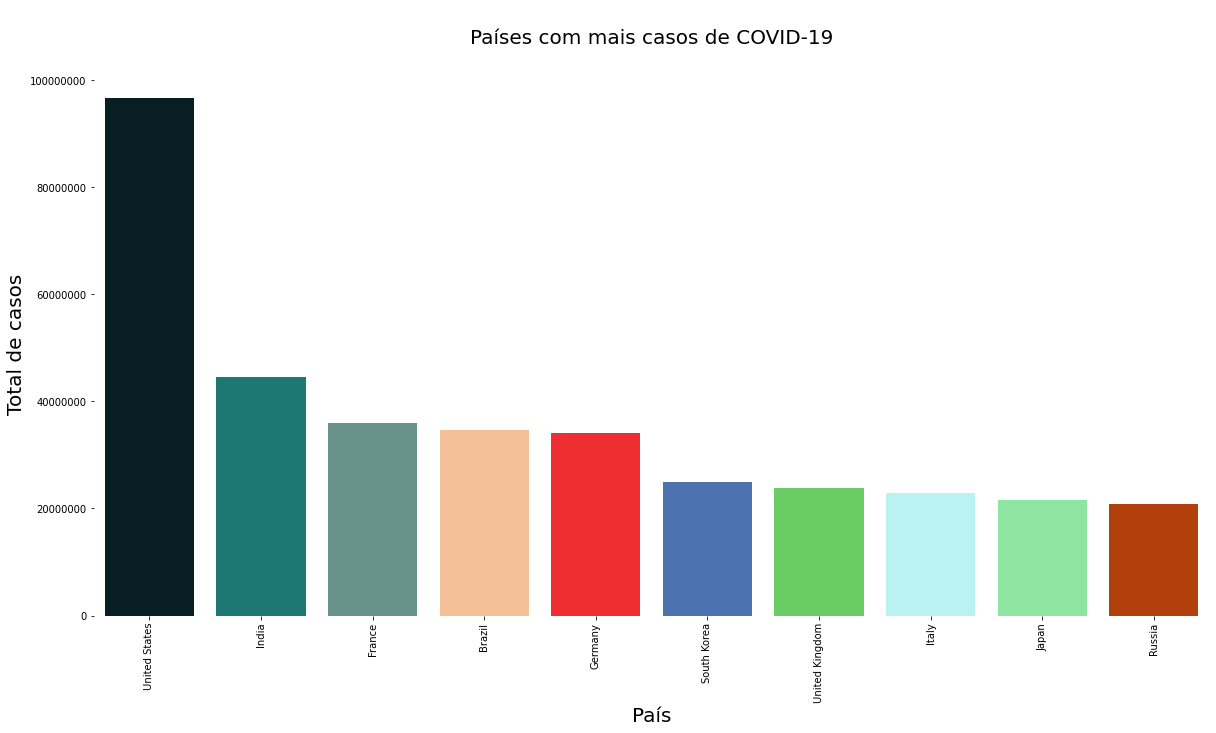

In [ ]:
df_cases = new_df.loc[new_df.date == '2022-10-10', ['location', 'total_cases']].sort_values(by="total_cases", ascending=False).copy()
df_cases.drop([235489, 93120, 69515, 12074, 70556, 226942, 156161, 125419, 198712,162068, 1979], axis=0, inplace=True)
palette = ["#071e22","#1d7874","#679289","#f4c095","#ee2e31", "#4C72B0", "#6ACC64", "#B9F2F0", "#8DE5A1", "#B1400D"]

plt.subplots(figsize=(20,10))
p = sns.barplot(x=df_cases["location"][:10],y=df_cases["total_cases"],palette=palette, saturation=3)
p.axes.set_title("\nPaíses com mais casos de COVID-19\n",fontsize=20)
plt.ylabel("Total de casos",fontsize=20)
plt.xlabel("País",fontsize=20)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)

sns.despine(left=True, bottom=True)
plt.show()

###Conforme depreende-se do gráfico acima, os 10 países com maior número de casos de COVID-19 no mundo são:


*   1 - Estados Unidos
*   2 - Índia
*   3 - França
*   4 - Brasil
*   5 - Alemanha
*   6 - Coréia do Sul
*   7 - Reino Unido
*   8 - Itália
*   9 - Japão
*   10 - Rússia


> Isso nos leva a importantes insights, como por exemplo a óbvia correlação entre a densidade populacional desses países e o elevado número de casos da doença. Uma vez que Estados Unidos, Índia, Brasil e Rússia estão inseridos no rol dos 10 países mais populosos do mundo, faz sentido que possuam mais casos de covid do que os demais países.

> Outro fato que chama a atenção é que a China, país mais populoso do mundo e que, segundo números divulgados pelo estudo World Population Prospects da ONU realizado em 2022, abriga aproximadamente 18% da população mundial, não figura entre os 10 países com mais casos da COVID-19.

> Ora, levando-se em consideração que aquele país asiático fora o epicentro do Coronavírus no mundo, bem como sua elevada densidade populacional, resta claro que podemos estar diante de um caso de subnotificação da doença naquele país.

















###Possível correlação com o Índice de Desenvolvimento Humano (IDH):

> A seguir apresentaremos o mesmo recorte do Dataset de Casos de COVID-19 acima, adicionando entretanto o IDH dos países.



In [ ]:
df_cases_1 = new_df.loc[new_df.date == '2022-10-10', ['location', 'total_cases', 'human_development_index']].sort_values(by="total_cases", ascending=False)
df_cases_1.drop([235489, 93120, 69515, 12074, 70556, 226942, 156161, 125419, 198712,162068, 1979], axis=0, inplace=True)
df_cases_1.head(10)

,location,total_cases,human_development_index
225082,United States,96716302.0,0.926
98194,India,44616394.0,0.645
75634,France,35937864.0,0.901
30033,Brazil,34724189.0,0.765
80646,Germany,34121168.0,0.947
199754,South Korea,24995246.0,0.916
224040,United Kingdom,23735277.0,0.932
106279,Italy,22830825.0,0.892
108314,Japan,21580581.0,0.919
176884,Russia,20916112.0,0.824




> Importante observar também que 9 entre os 10 países apresentados no ranking acima possuem IDH (Índice de Desenvolvimento Humano) classificado como Alto ou Muito Alto, sendo a Índia a única nação da lista com IDH médio. Isso pode nos levar à conclusão de que - quanto mais desenvolvido o país - mais afetado será pela COVID-19? Não necessariamente.

> Pode ser que esses países, por possuírem maiores recursos financeiros - realizem proporcionalmente mais testes em suas populações e registrem mais casos do que os demais, que não podem pagar por programas de testagem em massa e podem ser afetados pela subnotificação de casos.



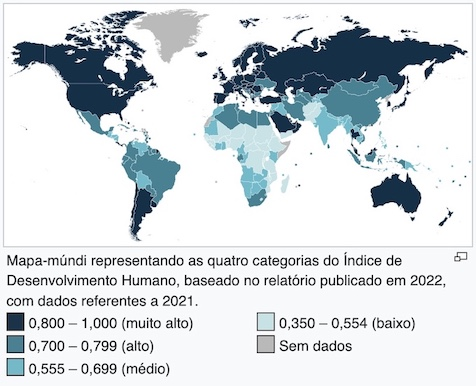



## --> QUAIS SÃO OS 10 PAÍSES COM MAIS MORTES POR COVID-19 NO MUNDO?

In [ ]:
top_10_dt = new_df.loc[new_df.date == '2022-10-10', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[9:].copy()
top_10_dt.drop([1979], axis=0, inplace=True)
top_10_dt.head(10)

,location,total_deaths
225082,United States,1062887.0
30033,Brazil,686877.0
98194,India,528822.0
176884,Russia,380451.0
137419,Mexico,330208.0
169522,Peru,216788.0
224040,United Kingdom,209141.0
106279,Italy,177570.0
99196,Indonesia,158219.0
75634,France,155604.0


###**A seguir, para melhor visualização, a representação gráfica dos 10 países com mais mortes em decorrência da COVID-19(dados do dia 10/10/2022):**




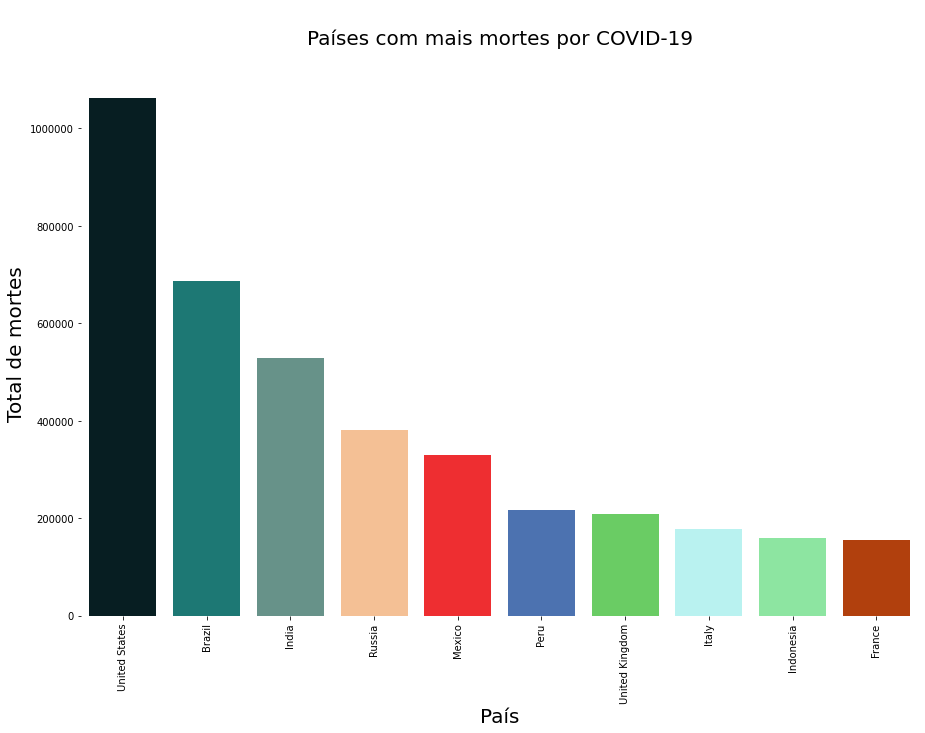

In [ ]:
palette = ["#071e22","#1d7874","#679289","#f4c095","#ee2e31", "#4C72B0", "#6ACC64", "#B9F2F0", "#8DE5A1", "#B1400D"]

plt.subplots(figsize=(15,10))
p = sns.barplot(x=top_10_dt["location"][:10],y=top_10_dt["total_deaths"],palette=palette, saturation=1)
p.axes.set_title("\nPaíses com mais mortes por COVID-19\n",fontsize=20)
plt.ylabel("Total de mortes",fontsize=20)
plt.xlabel("País",fontsize=20)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)


sns.despine(left=True, bottom=True)
plt.show()



##Como o vírus vem progredindo desde o início da Pandemia?

> Para responder a essa questão, é necessário traçar um gráfico que nos permita visualizar claramente a evolução da doença ao longo dos últimos 1.000 dias. Só então poderemos entender se há uma estabilização no número de mortos e/ou qual a tendência para o futuro.



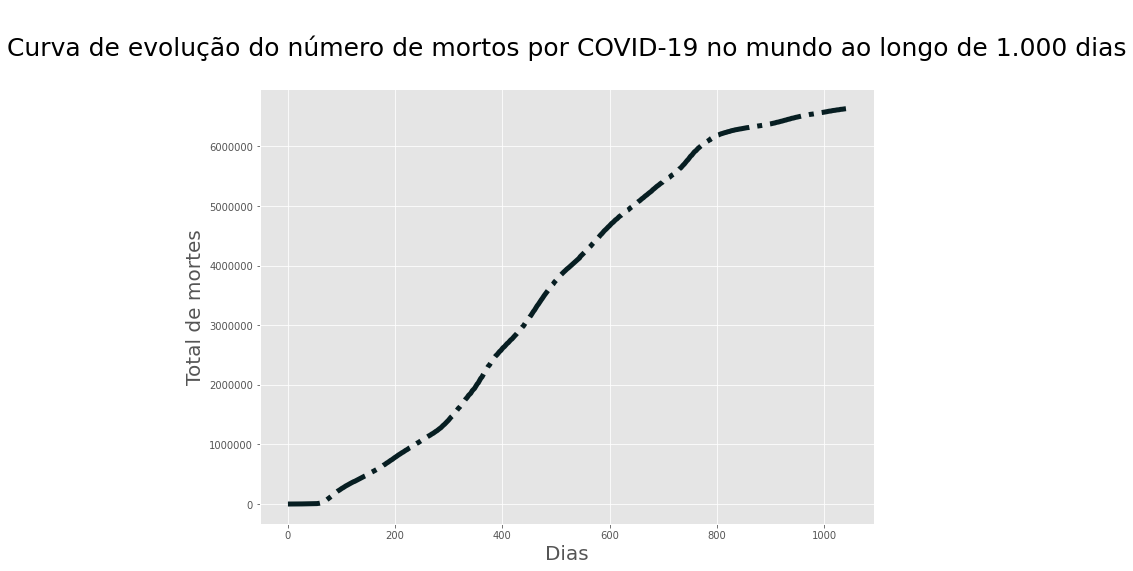

In [ ]:
death_evo = new_df.loc[new_df.location == "World", "total_deaths"].reset_index(drop=True)
plt.style.use('ggplot')
plt.figure(figsize=(11,8))
plt.title("\nCurva de evolução do número de mortos por COVID-19 no mundo ao longo de 1.000 dias\n",fontsize=25)
plt.ylabel("Total de mortes",fontsize=20)
plt.xlabel("Dias",fontsize=20)
plt.ticklabel_format(style='plain', axis='y')
sns.lineplot(data=death_evo, linestyle='dashdot', linewidth=5, color="#071e22")
plt.show()


###**Dando continuidade, apresento a evolução por continente;**

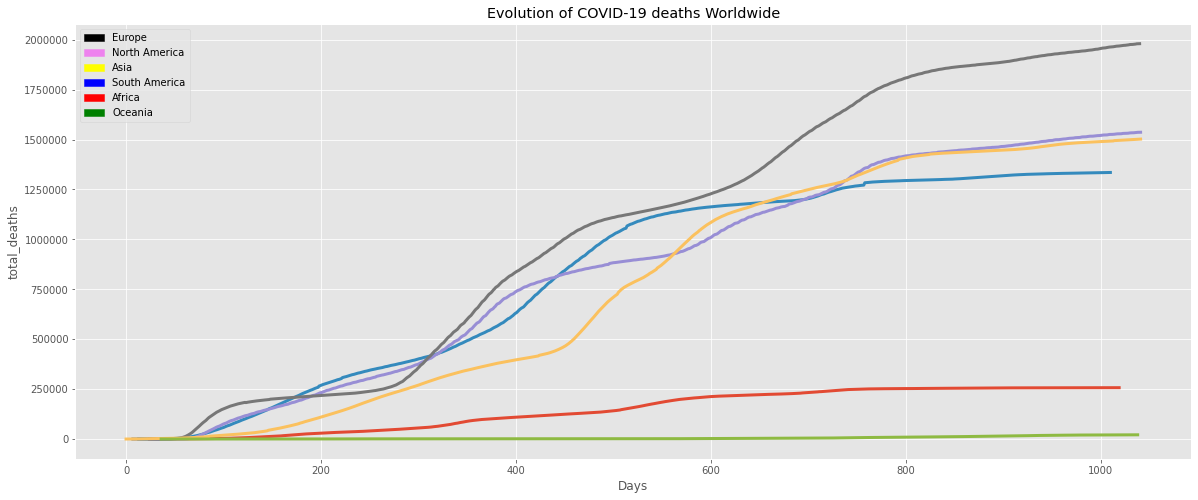

In [ ]:
import matplotlib.patches as mpatches

afr_evo = new_df.loc[new_df.location == "Africa", "total_deaths"].reset_index(drop=True)
south_evo = new_df.loc[new_df.location == "South America", "total_deaths"].reset_index(drop=True)
north_evo = new_df.loc[new_df.location == "North America", "total_deaths"].reset_index(drop=True)
euro_evo = new_df.loc[new_df.location == "Europe", "total_deaths"].reset_index(drop=True)
asia_evo = new_df.loc[new_df.location == "Asia", "total_deaths"].reset_index(drop=True)
ocea_evo = new_df.loc[new_df.location == "Oceania", "total_deaths"].reset_index(drop=True)

plt.style.use('ggplot')
plt.figure(figsize=(20, 8))
sns.lineplot(data=afr_evo, linewidth=3)
sns.lineplot(data=south_evo, linewidth=3)
sns.lineplot(data=north_evo, linewidth=3)
sns.lineplot(data=euro_evo, linewidth=3)
sns.lineplot(data=asia_evo, linewidth=3)
sns.lineplot(data=ocea_evo, linewidth=3)
plt.title('Evolution of COVID-19 deaths Worldwide')
plt.xlabel('Days')
plt.ticklabel_format(style='plain', axis='y')
black_patch = mpatches.Patch(color='black', label='Europe')
violet_patch = mpatches.Patch(color='violet', label='North America')
yellow_patch = mpatches.Patch(color='yellow', label='Asia')
blue_patch = mpatches.Patch(color='blue', label='South America')
red_patch = mpatches.Patch(color='red', label='Africa')
green_patch = mpatches.Patch(color='green', label='Oceania')
plt.legend(handles=[black_patch, violet_patch, yellow_patch, blue_patch, red_patch, green_patch], loc='upper left')
plt.show()



> Podemos concluir, após a observação dos gráficos de evolução do total de mortes por COVID-19 no mundo o que segue:


*   Após 1.000 dias desde o início da Pandemia, a curva que representa os mortos pelo coronavírus continua a apresentar tendência de alta. Entretanto, a evolução parece mais lenta em todos os continentes desde o dia 800.
*   A Europa é o continente onde mais pessoas foram mortas pelo COVID-19, mesmo não sendo o mais populoso do mundo. Isso se deve, provavelmente, à idade média da sua população que é a mais alta dentre todos os continentes, constituindo importante fator de risco quando se trata da COVID-19.
*   A África destoa muito em relação ao número de mortes nos demais continentes, mesmo sendo o segundo continente mais populoso do planeta, abrigando atualmente cerca de 17% da população mundial. Isto pode ser explicado por alguns fatores como: Idade média da população mais baixa do que nos demais continentes, subnotificação, programas de testagem insuficientes, transporte público limitado, altas temperaturas dentre outros;
*   É importante observar também que a Ásia hoje é o continente mais populoso do planeta, sendo a China o país mais populoso do mundo. Entretanto, ao observarmos a curva de evolução da doença inferimos que a Ásia parece não chegar nem perto dois números de continentes menos povoados, como a América do Norte e a Europa. Apesar dos problemas de média de idade mais elevada elenacdos acima como fatores de alto risco para as populações de América do Norte e Europa, fica claro que pode haver subnotificação nos números asiáticos, causada principalmente pela falha nos registros de mortes e/ou casos de COVID-19 na China.








#ANALISANDO OS DADOS DO BRASIL

> A seguir farei um recorte apenas do Brasil para que possamos tirar alguns insights valiosos a respeito da Pandemia do Coronavírus na maior nação da América do Sul.

> **Podemos perceber inicialmente que o primeiro caso de Coronavírus no Brasil fora registrado no dia 26/02/2020, pouco mais de três meses após o registro do primeiro caso da doenca no mundo, que se deu na China em 17/11/2019.**





In [ ]:
##FILTRANDO SOMENTE PELO BRASIL E A PARTIR DO PRIMEIRO CASO NOTIFICADO NO BR
br_df = new_df[(new_df['location'] == 'Brazil')].copy()
br_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
29076,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0
29077,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0
29078,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0
29079,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0
29080,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0


###**Quando foi registrada a primeira morte ocasionada pelo COVID-19 no Brasil?**





In [ ]:
br_df_1 = br_df[(br_df['location'] == 'Brazil') & (br_df['new_deaths'] > 0.0)]
br_df_1.head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
29096,BRA,South America,Brazil,2020-03-17,321.0,121.0,41.429,1.0,1.0,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0




> Conforme apontado acima, a primeira morte por COVID-19 no Brasil ocorreu no dia 17/03/2020.



###--> EFICIÊNCIA DOS PROGRAMAS DE IMUNIZAÇÃO BRASILEIROS

> Importante ressaltar que o Brasil é reconhecido mundialmente pelo sucesso de seus programas de vacinação, tendo sempre uma grande adesão de sua população aos imunizantes.

> **Isso se torna ainda mais evidente ao visualizarmos quais são os países com mais pessoas vacinadas contra a COVID-19 por milhares de habitantes, onde o Brasil aparece na Décima colocação, a frente de países muito. mais desenvolvidos como Itália, Japão e Nova Zelândia!**



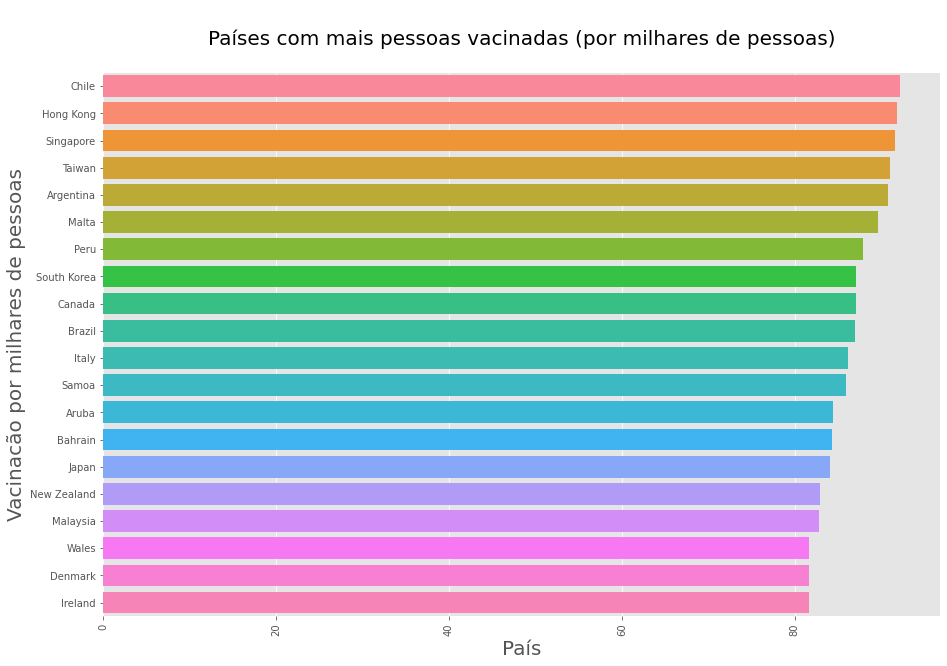

In [ ]:
top_20_vac = new_df.loc[new_df.date == '2022-10-10', ['location', 'people_fully_vaccinated_per_hundred', 'people_vaccinated_per_hundred']].sort_values(by="people_vaccinated_per_hundred", ascending=False)
top_20_vac.drop([198712,226942], axis=0, inplace=True)
plt.subplots(figsize=(15,10))
p = sns.barplot(y=top_20_vac["location"][:20], x=top_20_vac["people_vaccinated_per_hundred"], saturation=3, orient="h")
p.axes.set_title("\nPaíses com mais pessoas vacinadas (por milhares de pessoas)\n",fontsize=20)
plt.ylabel("Vacinacão por milhares de pessoas",fontsize=20)
plt.xlabel("País",fontsize=20)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=90)


sns.despine(left=True, bottom=True)
plt.show()

###--> Por fim, passaremos à análise da evolução do número de mortes por COVID-19 no Brasil, bem como à comparação entre o número de mortos e o número de casos. 

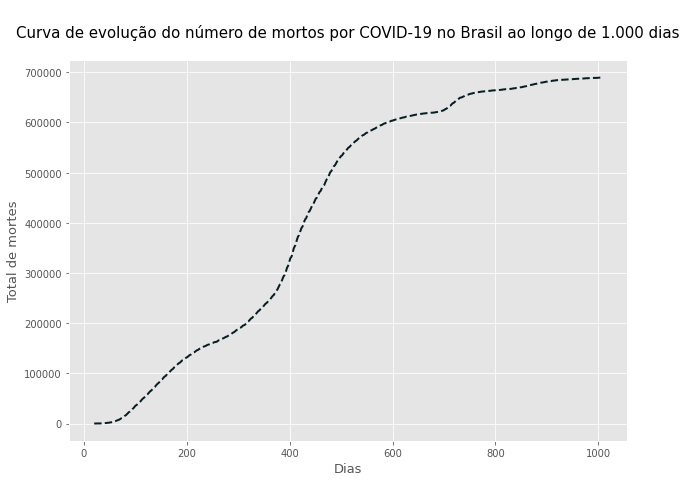

In [ ]:
br_evo = br_df.loc[br_df.location == "Brazil", "total_deaths"].reset_index(drop=True)
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
plt.title("\nCurva de evolução do número de mortos por COVID-19 no Brasil ao longo de 1.000 dias\n",fontsize=15)
plt.ylabel("Total de mortes",fontsize=13)
plt.xlabel("Dias",fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
sns.lineplot(data=br_evo, linestyle='--', linewidth=2, color="#071e22")
plt.show()

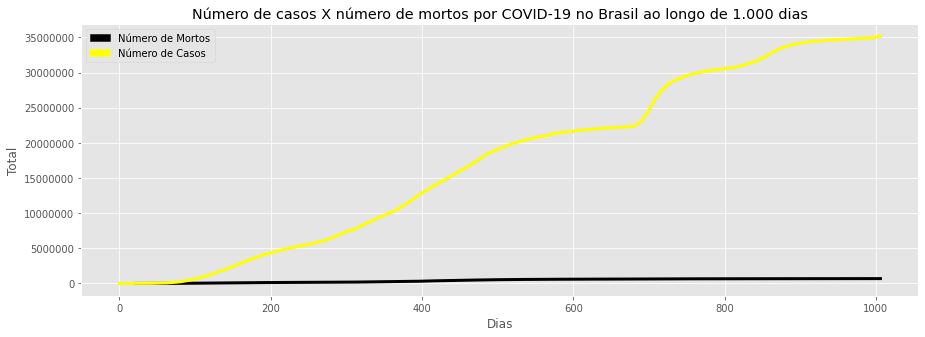

In [ ]:
br_evo_dt = br_df.loc[br_df.location == "Brazil", "total_deaths"].reset_index(drop=True)
br_evo_cs = br_df.loc[br_df.location == "Brazil", "total_cases"].reset_index(drop=True)

plt.style.use('ggplot')
plt.figure(figsize=(15, 5))
sns.lineplot(data=br_evo_dt, linewidth=3, color="black")
sns.lineplot(data=br_evo_cs, linewidth=3, color="yellow")
plt.title('Número de casos X número de mortos por COVID-19 no Brasil ao longo de 1.000 dias')
plt.xlabel('Dias')
plt.ylabel('Total')
plt.ticklabel_format(style='plain', axis='y')
black_patch = mpatches.Patch(color='black', label='Número de Mortos')
yellow_patch = mpatches.Patch(color='yellow', label='Número de Casos')
plt.legend(handles=[black_patch, yellow_patch], loc='upper left')
plt.show()

##CONCLUSÃO

> Podemos concluir que a pandemia do COVID-19 vem sendo um dos maiores desafios enfrentados pela humanidade na contemporaneidade.

> Apesar dos grandes esforços empreendidos pelos países com vistas a minizmizar as consequências da doença, fica claro que teremos que conviver com este patógeno durante os próximos anos, devendo ao máximo manter as medidas de imunização e os cuidados básicos de saúde.

> Resta claro outrossim, que as vacinas desenvolvidas com o fito de combater a mortalidade do vírus tem sido as maiores aliadas da humanidade no combate ao Coronavírus.

> Por fim, é importante ressaltar que as nações mais desenvolvidas do mundo possuem papel primordial no auxílio aos demais países para erradicação do vírus, uma vez que podem contribuir com recursos financeiros necessários à testagem e vacinação em massa.








